<a href="https://colab.research.google.com/github/Rinianggra22/Klasifikasi-Obesitas/blob/main/Klasifikasi_Obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/BigData/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/BigData/ObesityDataSet_raw_and_data_sinthetic.csv', header=None)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.8,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,Female,20.976842,1.71073,131.408528,yes,yes,3,3,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,21.982942,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2.00513,no,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,22.524036,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24.361936,1.73945,133.346641,yes,yes,3,3,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
dataset.columns=["Gender","Age","Height","Weight","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS","NObeyesdad",]

In [ ]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.8,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I


In [ ]:
data = {
    'Age': [25, 30, 22, 35, 28, 40, 33, 29],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'DailyCalories': [2500, 2000, 2700, 1500, 2200, 1800, 2600, 1900],
    'ExerciseHours': [1.5, 0.5, 2.0, 0.2, 1.0, 0.3, 1.8, 0.7],
    'HealthStatus': ['Healthy', 'Unhealthy', 'Healthy', 'Unhealthy', 'Healthy', 'Unhealthy', 'Healthy', 'Unhealthy']
}

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          2112 non-null   object
 1   Age                             2112 non-null   object
 2   Height                          2112 non-null   object
 3   Weight                          2112 non-null   object
 4   family_history_with_overweight  2112 non-null   object
 5   FAVC                            2112 non-null   object
 6   FCVC                            2112 non-null   object
 7   NCP                             2112 non-null   object
 8   CAEC                            2112 non-null   object
 9   SMOKE                           2112 non-null   object
 10  CH2O                            2112 non-null   object
 11  SCC                             2112 non-null   object
 12  FAF                             2112 non-null   

In [ ]:
dataset.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112
unique,3,1403,1575,1526,3,3,811,636,5,3,1269,3,1191,1130,5,6,8
top,Male,18,1.7,80,yes,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,128,60,59,1726,1866,652,1203,1765,2067,448,2015,411,557,1401,1580,351


In [ ]:
dataset.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df = pd.DataFrame(data)

In [ ]:
print(df)

   Age  Gender  DailyCalories  ExerciseHours  HealthStatus
0   25       1           2500            1.5             0
1   30       0           2000            0.5             1
2   22       1           2700            2.0             0
3   35       0           1500            0.2             1
4   28       1           2200            1.0             0
5   40       0           1800            0.3             1
6   33       1           2600            1.8             0
7   29       0           1900            0.7             1


In [ ]:
correlation_matrix = df.corr()

In [ ]:
print(correlation_matrix)

                    Age    Gender  DailyCalories  ExerciseHours  HealthStatus
Age            1.000000 -0.609449      -0.673331      -0.679982      0.609449
Gender        -0.609449  1.000000       0.881917       0.887244     -1.000000
DailyCalories -0.673331  0.881917       1.000000       0.972020     -0.881917
ExerciseHours -0.679982  0.887244       0.972020       1.000000     -0.887244
HealthStatus   0.609449 -1.000000      -0.881917      -0.887244      1.000000


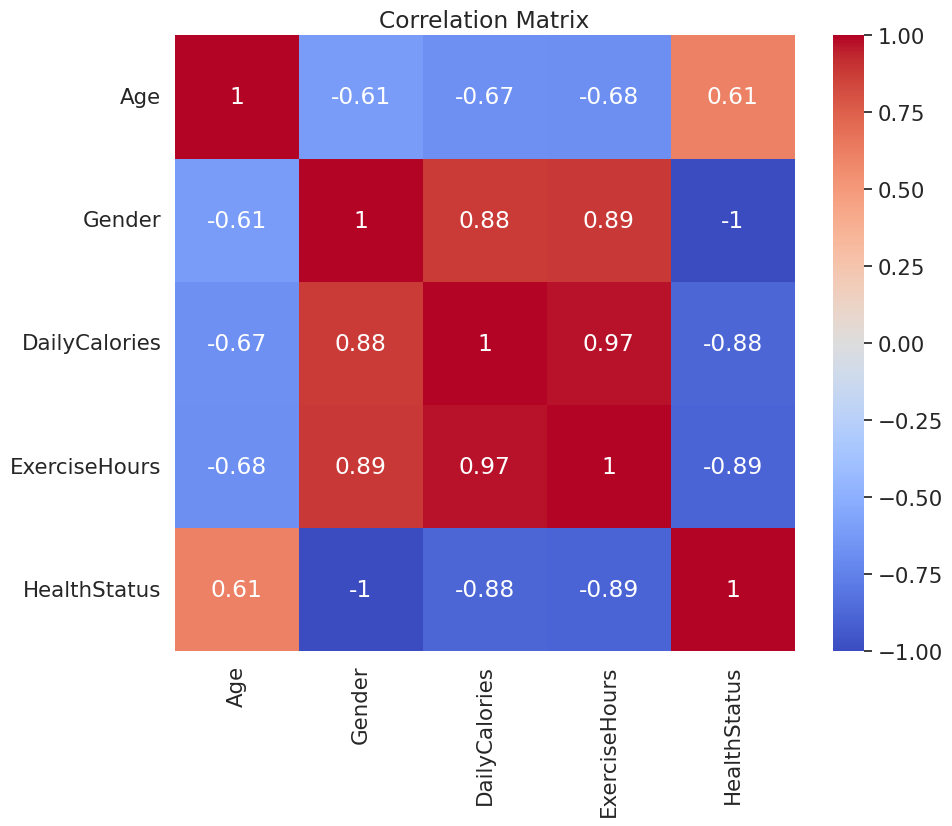

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['HealthStatus'] = label_encoder.fit_transform(df['HealthStatus'])

In [ ]:
X = df[['Age', 'Gender', 'DailyCalories', 'ExerciseHours']]
y = df['HealthStatus']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333


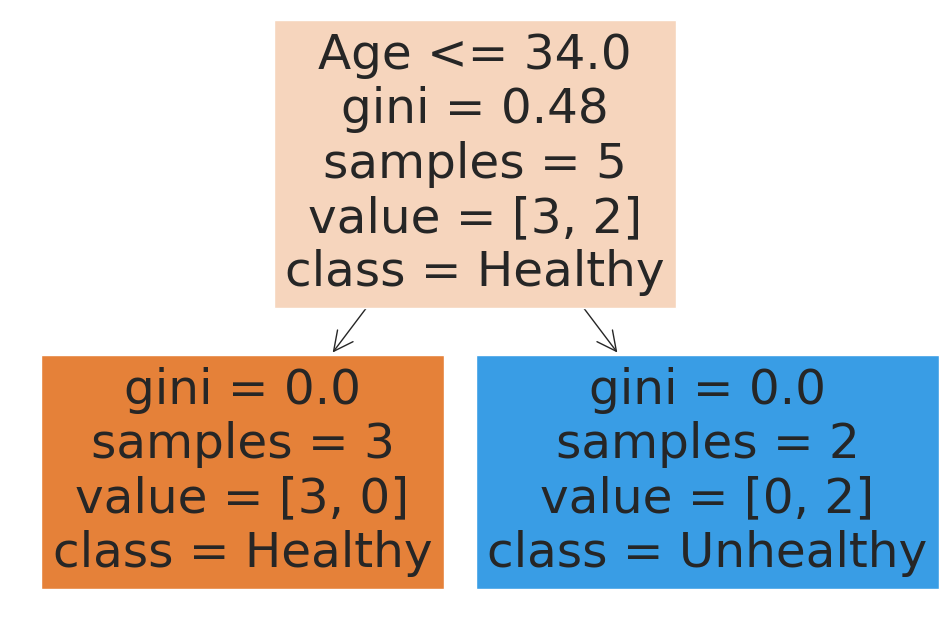

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['Healthy', 'Unhealthy'], filled=True)
plt.show()